In [1]:
import sys
import os
import numpy as np
import time
import timeit
import matplotlib.pyplot as plt

# Get and print current working directory
current_path = os.getcwd()
print("Current path:", current_path)

# Modify path and update system path
current_path = current_path.replace('/samples', '')
print(sys.path)  # Show all module search paths
sys.path.append(current_path)  # Add custom path
print(sys.path)  # Show updated module search paths


Current path: /Users/yang/PycharmProjects/Option/samples
['/Users/yang/PycharmProjects/Option/samples', '/Users/yang/PycharmProjects/Option', '/opt/anaconda3/lib/python312.zip', '/opt/anaconda3/lib/python3.12', '/opt/anaconda3/lib/python3.12/lib-dynload', '', '/opt/anaconda3/lib/python3.12/site-packages', '/opt/anaconda3/lib/python3.12/site-packages/aeosa']
['/Users/yang/PycharmProjects/Option/samples', '/Users/yang/PycharmProjects/Option', '/opt/anaconda3/lib/python312.zip', '/opt/anaconda3/lib/python3.12', '/opt/anaconda3/lib/python3.12/lib-dynload', '', '/opt/anaconda3/lib/python3.12/site-packages', '/opt/anaconda3/lib/python3.12/site-packages/aeosa', '/Users/yang/PycharmProjects/Option']


# Stock Comparison

# Financial Derivatives Pricing Model Testing

### This file tests the implementation of Black-Scholes, Black-Scholes-Merton, and Heston models in the QlStocks class

### Path generation testing



In [2]:
import QuantLib as ql
from src.utils import plot_fig
from src.QlCalendar import QlCalendar
from src.QlStocks import QlStocks


In [3]:
# Initialize calendar with start date
start_date = ql.Date(1, 1, 2020)
ql_calendar = QlCalendar(init_date=start_date)

# Create stock pricing instance
ql_stocks = QlStocks(ql_calendar)


In [4]:
# Display day counter used in calendar
ql_calendar.day_counter


<QuantLib.QuantLib.Actual365Fixed; proxy of <Swig Object of type 'QuantLib::Actual365Fixed *' at 0x136745a10> >

## Model Generation

### Testing different pricing models:
- Black-Scholes model (basic geometric Brownian motion)
- Black-Scholes-Merton model (with dividends)
- Heston model (stochastic volatility)


In [5]:
print("Testing Black-Scholes model:")
ql_stocks.add_black_scholes(codes=["GOOG", "MSFT"], stock_prices=[120.0, 80.0], volatility=[0.3, 0.2])

print("Testing Black-Scholes-Merton model:")
ql_stocks.add_black_scholes_merton(codes=["TSLA", "BTC"], stock_prices=[[120.0, 121.5, 123.5], [80.0, 81.5, 79.8]], volatility=[0.3, 0.2])

# Display model parameters
ql_stocks.ql_df


Testing Black-Scholes model:
Testing Black-Scholes-Merton model:


price_quote  \
codes                                                      
GOOG   <QuantLib.QuantLib.SimpleQuote; proxy of <Swig...   
MSFT   <QuantLib.QuantLib.SimpleQuote; proxy of <Swig...   
TSLA   <QuantLib.QuantLib.SimpleQuote; proxy of <Swig...   
BTC    <QuantLib.QuantLib.SimpleQuote; proxy of <Swig...   

                                          dividend_quote  \
codes                                                      
GOOG                                                None   
MSFT                                                None   
TSLA   <QuantLib.QuantLib.SimpleQuote; proxy of <Swig...   
BTC    <QuantLib.QuantLib.SimpleQuote; proxy of <Swig...   

                                              volatility        process_types  \
codes                                                                           
GOOG   <QuantLib.QuantLib.SimpleQuote; proxy of <Swig...         black_schole   
MSFT   <QuantLib.QuantLib.SimpleQuote; proxy of <Swig...         black_schole   
TSLA   <QuantLib.QuantLib.SimpleQuote; proxy of <Swig...  black_schole_merton   
BTC    <QuantLib.QuantLib.SimpleQuote; proxy of <Swig...  black_schole_merton   

                                               processes  
codes                                                     
GOOG   <QuantLib.QuantLib.BlackScholesProcess; proxy ...  
MSFT   <QuantLib.QuantLib.BlackScholesProcess; proxy ...  
TSLA   <QuantLib.QuantLib.BlackScholesMertonProcess; ...  
BTC    <QuantLib.QuantLib.BlackScholesMertonProcess; ...

In [6]:
print("Testing Heston model:")
# Heston model parameters
S0 = 100.0  # Initial stock price
V0 = 0.04  # Initial volatility
kappa = 2.0  # Mean reversion speed of volatility
theta = 0.04  # Long-term mean of volatility
sigma = 0.3  # Volatility of volatility
rho = -0.7  # Correlation between price and volatility
r = 0.05  # Risk-free rate
K = 100.0  # Option strike price

ql_stocks.add_heston(codes="APPL",
                     stock_prices=S0,
                     v0=V0,
                     kappa=kappa,
                     theta=theta,
                     rho=rho,
                     sigma=sigma,
                     dividend_rates=0.0,
                     )
# Display model parameters
ql_stocks.ql_df


Testing Heston model:


price_quote  \
codes                                                      
GOOG   <QuantLib.QuantLib.SimpleQuote; proxy of <Swig...   
MSFT   <QuantLib.QuantLib.SimpleQuote; proxy of <Swig...   
TSLA   <QuantLib.QuantLib.SimpleQuote; proxy of <Swig...   
BTC    <QuantLib.QuantLib.SimpleQuote; proxy of <Swig...   
APPL   <QuantLib.QuantLib.SimpleQuote; proxy of <Swig...   

                                          dividend_quote  \
codes                                                      
GOOG                                                None   
MSFT                                                None   
TSLA   <QuantLib.QuantLib.SimpleQuote; proxy of <Swig...   
BTC    <QuantLib.QuantLib.SimpleQuote; proxy of <Swig...   
APPL   <QuantLib.QuantLib.SimpleQuote; proxy of <Swig...   

                                              volatility        process_types  \
codes                                                                           
GOOG   <QuantLib.QuantLib.SimpleQuote; proxy of <Swig...         black_schole   
MSFT   <QuantLib.QuantLib.SimpleQuote; proxy of <Swig...         black_schole   
TSLA   <QuantLib.QuantLib.SimpleQuote; proxy of <Swig...  black_schole_merton   
BTC    <QuantLib.QuantLib.SimpleQuote; proxy of <Swig...  black_schole_merton   
APPL                                                None               heston   

                                               processes  
codes                                                     
GOOG   <QuantLib.QuantLib.BlackScholesProcess; proxy ...  
MSFT   <QuantLib.QuantLib.BlackScholesProcess; proxy ...  
TSLA   <QuantLib.QuantLib.BlackScholesMertonProcess; ...  
BTC    <QuantLib.QuantLib.BlackScholesMertonProcess; ...  
APPL   <QuantLib.QuantLib.HestonProcess; proxy of <Sw...

In [7]:
# Display current stock prices
ql_stocks.get_today_prices()


GOOG    120.0
MSFT     80.0
TSLA    120.0
BTC      80.0
APPL    100.0
Name: January 2nd, 2020, dtype: float64

## Path Generation Parameters

- n_paths: Number of Monte Carlo paths to generate
- steps: Number of time steps in each path (daily for 1 year)


In [8]:
n_paths = 20000
steps = 252  # Daily steps for 1 year (252 trading days)


## Black-Scholes Model Path Generation

### Generating paths for GOOG (Google) using basic Black-Scholes model


In [9]:
goog = ql_stocks.stock('GOOG')


In [10]:
goog_paths = goog.stock_paths(n_paths, steps)


使用步数: 252 步
timesteps: 252, Time length(per year): 1.0164383561643835start_date: January 2nd, 2020 end_date: January 7th, 2021


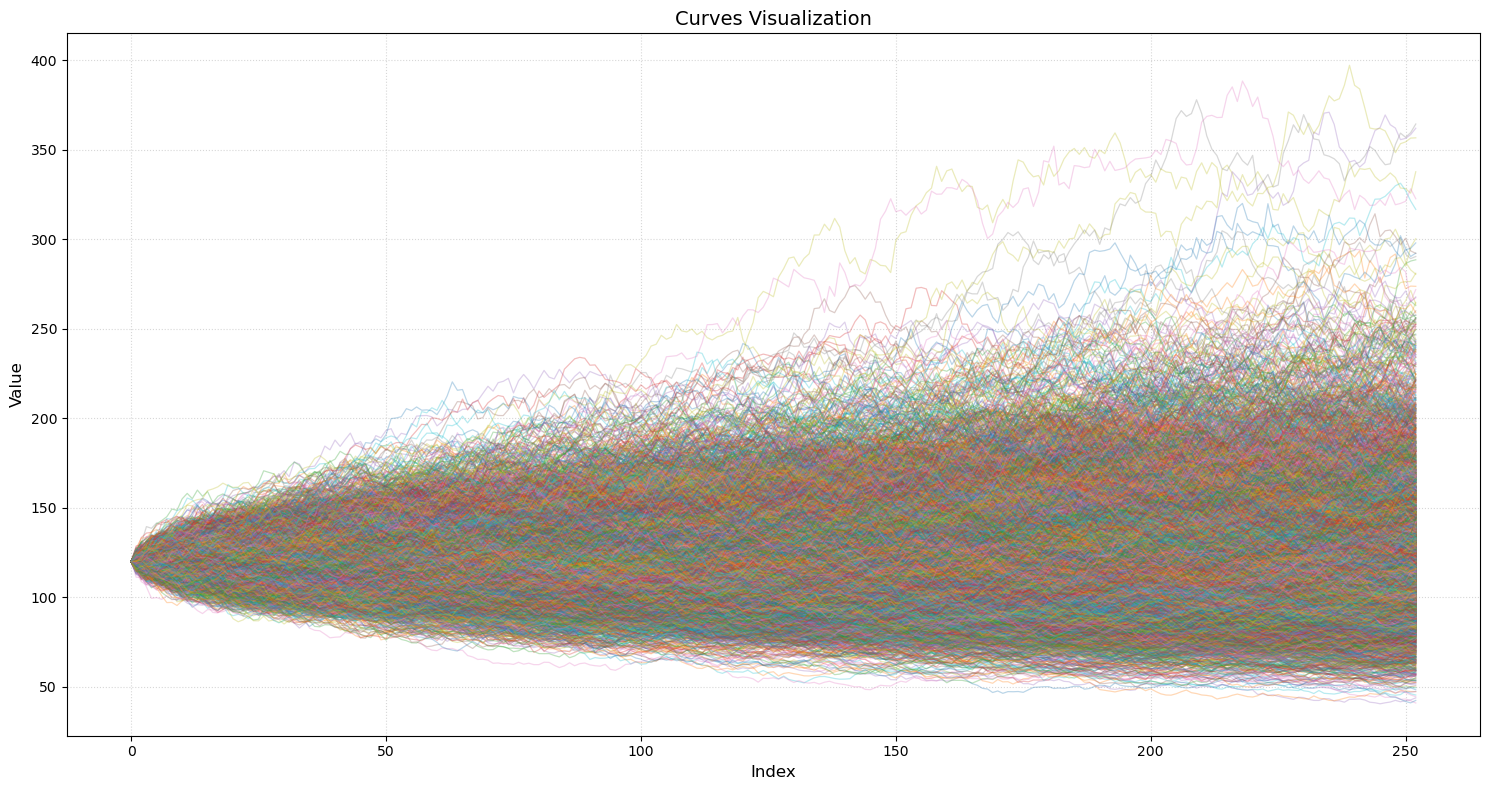

In [11]:
# Plot first 5000 paths for visualization
plot_fig(goog_paths[:5000])


## Black-Scholes-Merton Model Path Generation

### Generating paths for TSLA (Tesla) using Black-Scholes-Merton model


In [12]:
tsla = ql_stocks.stock('TSLA')


In [13]:
tsla_paths = tsla.stock_paths(n_paths, steps)


使用步数: 252 步
timesteps: 252, Time length(per year): 1.0164383561643835start_date: January 2nd, 2020 end_date: January 7th, 2021


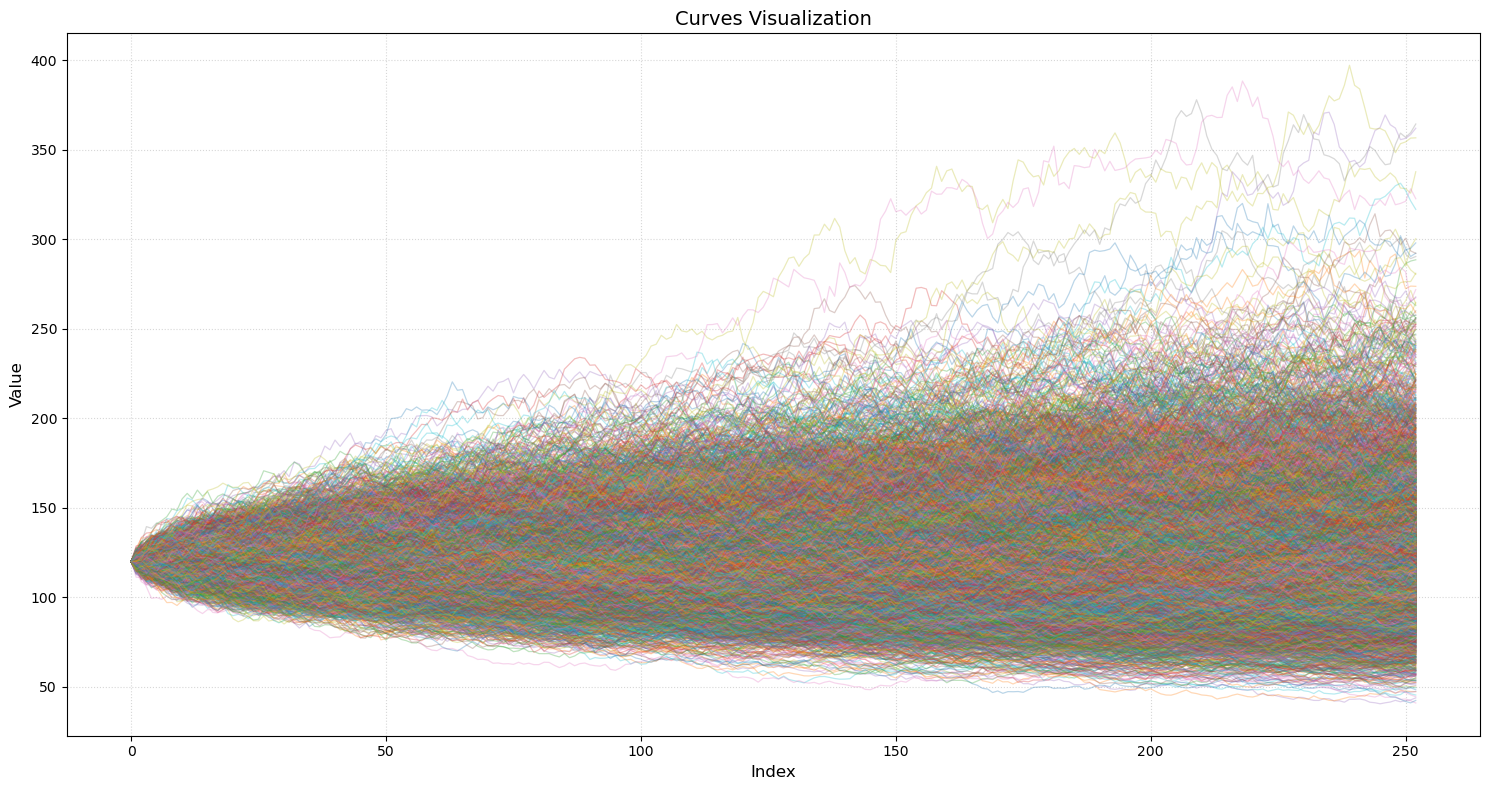

In [14]:
# Plot first 5000 paths for visualization
plot_fig(tsla_paths[:5000])


## Heston Model Path Generation

### Generating paths for APPL (Apple) using Heston stochastic volatility model


In [15]:
appl = ql_stocks.stock('APPL')


In [16]:
appl_paths = appl.stock_paths(n_paths, steps)


使用步数: 252 步
timesteps: 252, Time length(per year): 1.0164383561643835start_date: January 2nd, 2020 end_date: January 7th, 2021


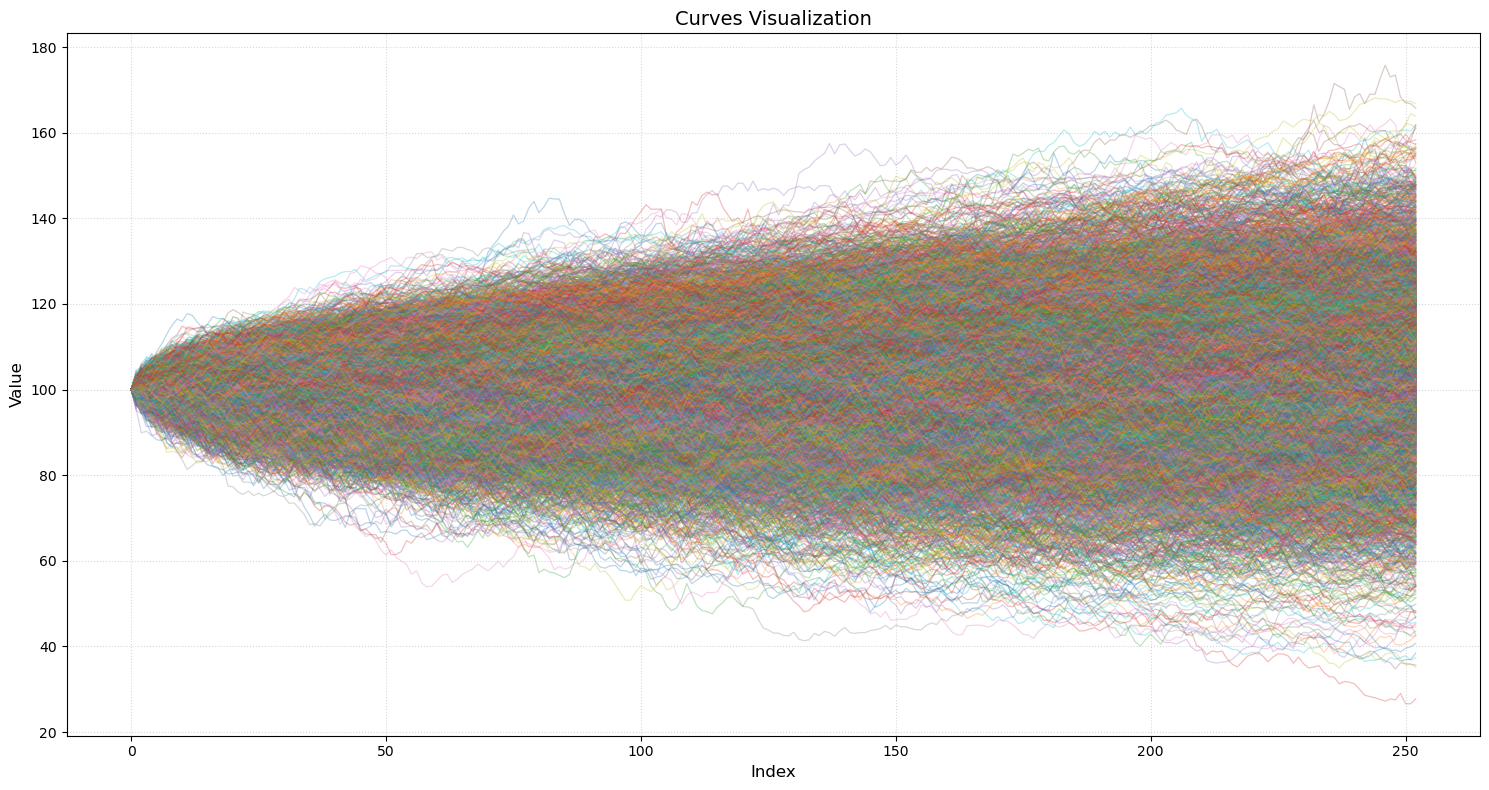

In [17]:
# Plot first 5000 paths for visualization
plot_fig(appl_paths[:5000])


## Final Price Distribution Comparison

### Density histogram comparison of terminal prices for all three models


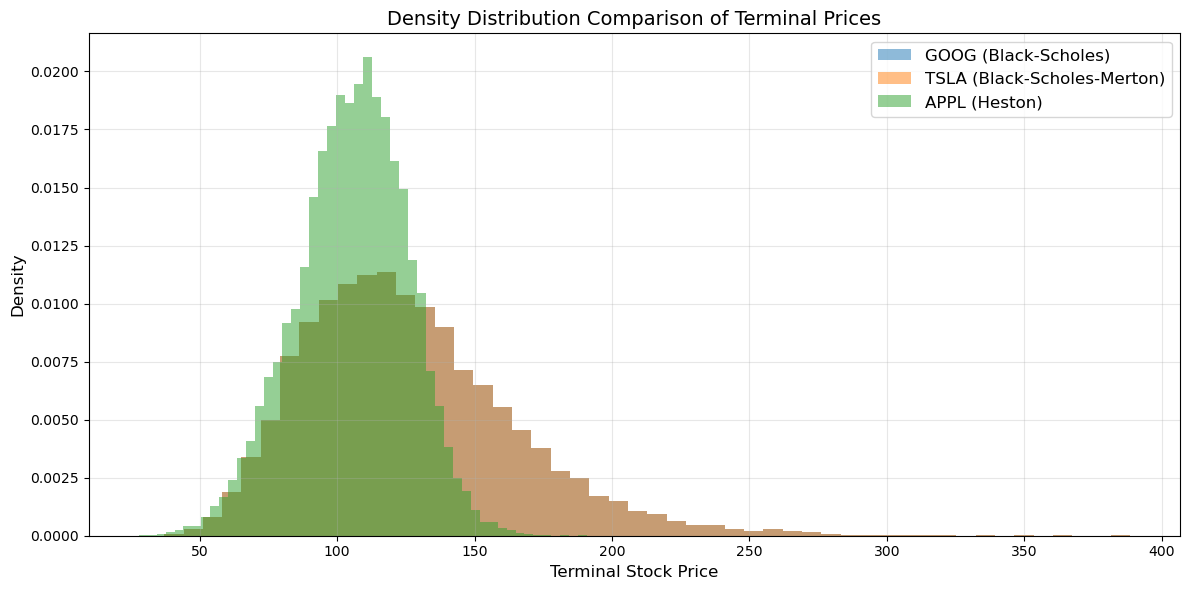

In [18]:
# Extract final day prices for each model
goog_final = goog_paths[:,-1]
tsla_final = tsla_paths[:,-1]
appl_final = appl_paths[:,-1]

# Create figure
plt.figure(figsize=(12, 6))

# Plot histograms with density normalization
plt.hist(goog_final, bins=50, alpha=0.5, density=True, label='GOOG (Black-Scholes)')
plt.hist(tsla_final, bins=50, alpha=0.5, density=True, label='TSLA (Black-Scholes-Merton)')
plt.hist(appl_final, bins=50, alpha=0.5, density=True, label='APPL (Heston)')

# Add labels and title
plt.title('Density Distribution Comparison of Terminal Prices', fontsize=14)
plt.xlabel('Terminal Stock Price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=12)

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Show plot
plt.tight_layout()
plt.show()


In [21]:
# numpy
# Simulate Heston model
import torch
T= 1
def simulate_heston(n_paths, n_steps, S0, V0, kappa, theta, rho, sigma, r):
    dt = T / n_steps
    sqrt_dt = np.sqrt(dt)

    # Initialize paths
    S = np.zeros((n_paths, n_steps + 1))
    V = np.zeros((n_paths, n_steps + 1))
    integrated_var = np.zeros((n_paths, n_steps + 1))

    # Set initial values
    S[:, 0] = S0
    V[:, 0] = V0

    # Generate correlated random numbers using PyTorch
    Z1 = torch.randn(n_paths, n_steps).numpy()
    Z2 = rho * Z1 + np.sqrt(1 - rho ** 2) * torch.randn(n_paths, n_steps).numpy()

    # Simulate paths
    for t in range(n_steps):
        # Ensure volatility is positive
        V[:, t] = np.maximum(V[:, t], 0)

        # Update stock price
        S[:, t + 1] = S[:, t] * np.exp((r - 0.5 * V[:, t]) * dt + np.sqrt(V[:, t]) * sqrt_dt * Z1[:, t])

        # Update volatility
        V[:, t + 1] = V[:, t] + kappa * (theta - V[:, t]) * dt + sigma * np.sqrt(V[:, t]) * sqrt_dt * Z2[:, t]

        # Calculate integrated variance
        integrated_var[:, t + 1] = integrated_var[:, t] + V[:, t] * dt

    return S, V, integrated_var

In [22]:
t0 = time.time()
S, V, integrated_var = simulate_heston(
    n_paths=n_paths,
    n_steps=252,
    S0=S0,
    V0=V0,
    kappa=kappa,
    theta=theta,
    rho=rho,
    sigma=sigma,
    r=r,
)
print(f' numpy generate paths: {time.time() - t0:.2f} seconds')

 numpy generate paths: 0.89 seconds


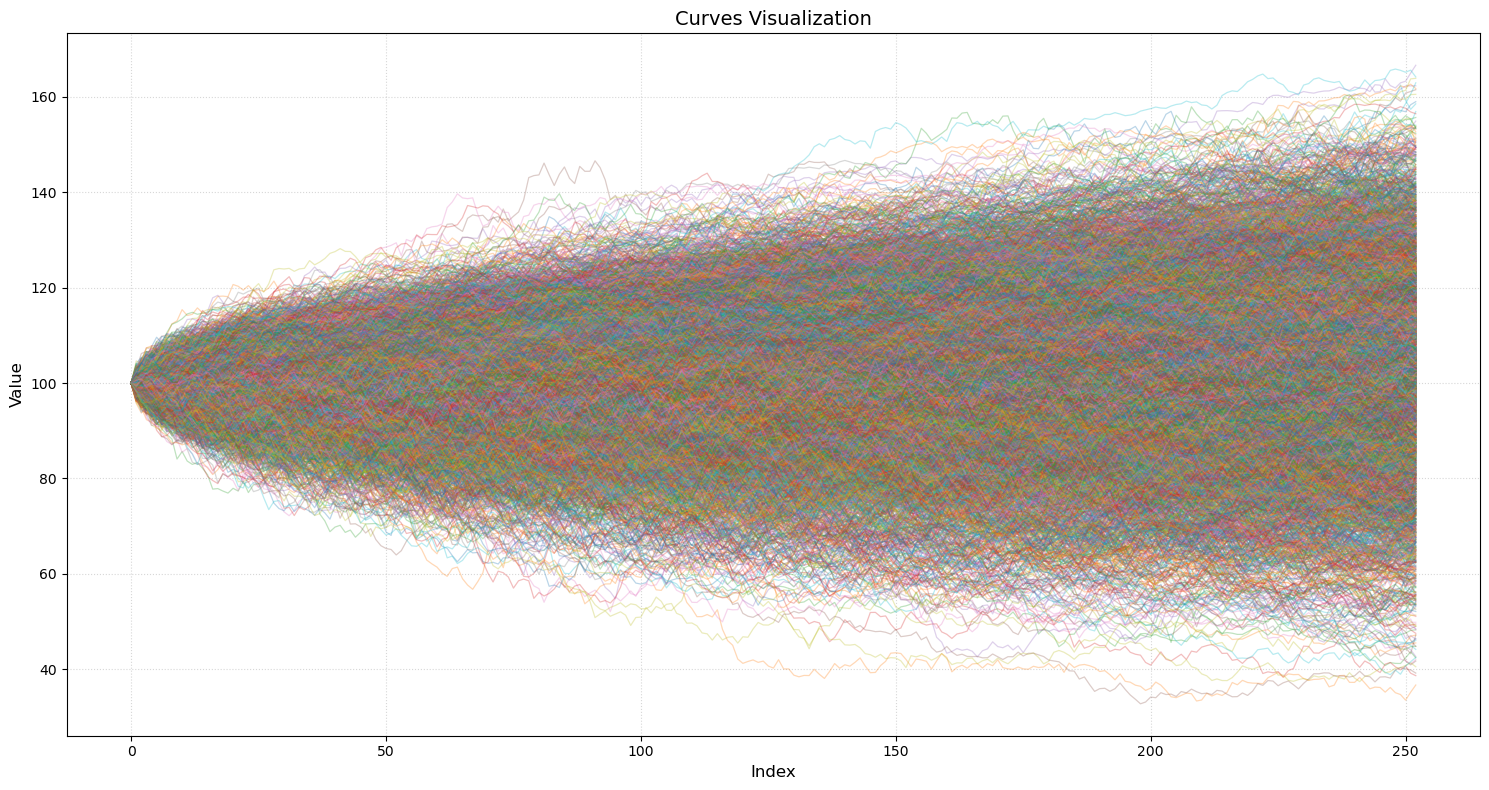

In [25]:
plot_fig(S[:5000])

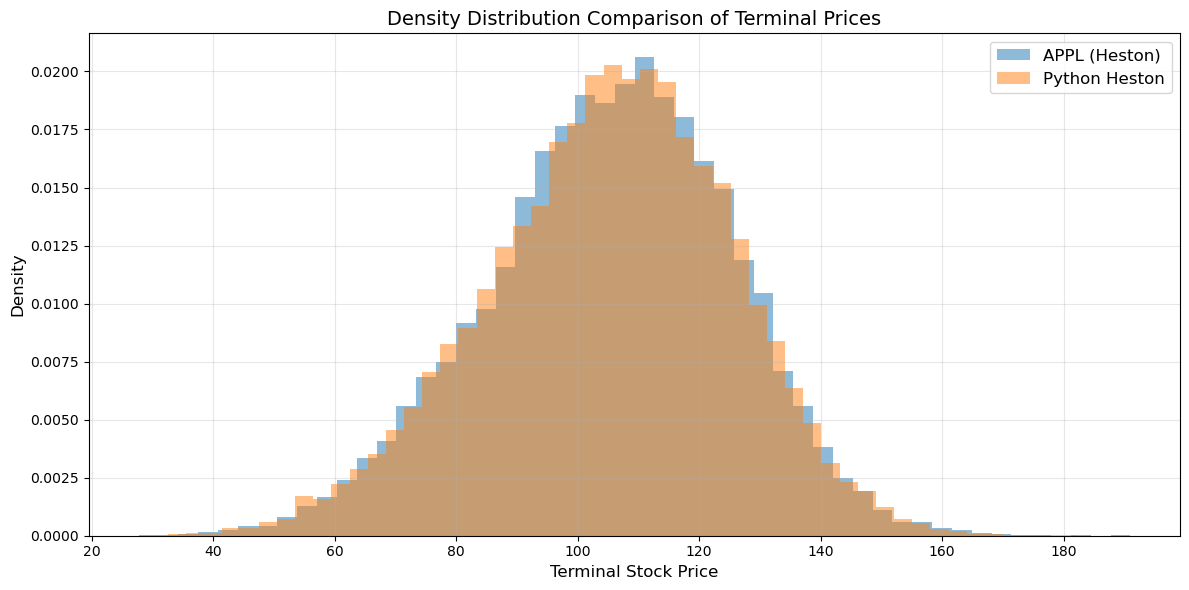

In [27]:
# Create figure
plt.figure(figsize=(12, 6))

# Plot histograms with density normalization
plt.hist(appl_final, bins=50, alpha=0.5, density=True, label='APPL (Heston)')
plt.hist(S[:, -1], bins=50, alpha=0.5, density=True, label='Python Heston')

# Add labels and title
plt.title('Density Distribution Comparison of Terminal Prices', fontsize=14)
plt.xlabel('Terminal Stock Price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=12)

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Show plot
plt.tight_layout()
plt.show()

In [30]:
appl_paths

array([[100.        , 100.03322949, 100.066488  , ..., 109.00572654,
        109.04405572, 109.08240097],
       [100.        , 101.23255577, 102.43983387, ...,  98.8184291 ,
         98.8622358 ,  98.90584553],
       [100.        ,  98.80977152,  97.59680789, ..., 114.66783509,
        114.70343538, 114.73975536],
       ...,
       [100.        , 101.13974085, 100.47526836, ...,  86.80874355,
         86.01023698,  87.65624416],
       [100.        ,  98.11166711,  99.93935999, ...,  87.64122865,
         89.88069134,  88.40911565],
       [100.        ,  98.9660729 ,  97.92579497, ...,  73.85623379,
         73.17170542,  76.59857759]])